We have trained on all HCP with SimCLR on the right and on the left hemisphere respectively. We test with a linear classifier on ACCpatterns (respectively left and right hemisphere, same hemisphere as for the training)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
def confidence_interval(data, percentage=95):
    if percentage == 95:
        z = 1.96
    else:
        raise(ValueError("frero..."))
    
    std = np.std(data)
    N = data.shape[0]

    diff = z * std/np.sqrt(N)

    return diff

import os

def last_part(path):
    return os.sep.join(path.rsplit(r"/")[-2:-1])

# bdd checks

In [9]:
bdd_right = pd.read_csv("/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/checks/summary/bdd_HCP_right.csv", index_col=0)
bdd_right.head()


,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,environment,train_val_csv_file,train_loss,val_loss
0,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.693157,0.002256,0.661830,0.004736,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.601206,0.671830
1,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.745505,0.001836,0.689630,0.005005,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.537051,0.959181
2,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.737606,0.002046,0.707449,0.006645,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.452796,0.693969
3,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.744634,0.002350,0.726768,0.005165,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.645914,0.924246
4,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.730974,0.001801,0.685619,0.004312,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.450463,0.895402


In [10]:
bdd_left = pd.read_csv("/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/checks/summary/bdd_HCP_left.csv", index_col=0)
bdd_left.head()

,model_path,auc,auc_std,accuracy,accuracy_std,train_loss,val_loss
0,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.763804,0.001976,0.709853,0.002826,0.565992,0.946132
1,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.744117,0.002782,0.688997,0.005754,0.479574,0.917666
2,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.767610,0.001247,0.718979,0.004170,0.390120,0.703938
3,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.705740,0.003717,0.655085,0.006019,0.681832,1.187335
4,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.753253,0.001523,0.697771,0.003801,0.664592,0.932220


In [13]:
bdd = pd.concat([bdd_right, bdd_left], ignore_index=True, sort=False)

In [14]:
bdd = bdd.sort_values(by=['model_path'], ascending=True)
bdd.head()

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,environment,train_val_csv_file,train_loss,val_loss
11,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.763804,0.001976,0.709853,0.002826,NaN,NaN,NaN,0.565992,0.946132
12,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.744117,0.002782,0.688997,0.005754,NaN,NaN,NaN,0.479574,0.917666
13,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.767610,0.001247,0.718979,0.004170,NaN,NaN,NaN,0.390120,0.703938
14,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.705740,0.003717,0.655085,0.006019,NaN,NaN,NaN,0.681832,1.187335
15,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.753253,0.001523,0.697771,0.003801,NaN,NaN,NaN,0.664592,0.932220


In [15]:
bdd["short_model_path"] = bdd.model_path.apply(last_part)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,dataset_name,environment,train_val_csv_file,train_loss,val_loss,short_model_path
11,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.763804,0.001976,0.709853,0.002826,NaN,NaN,NaN,0.565992,0.946132,trained_on_all_left_HCP
12,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.744117,0.002782,0.688997,0.005754,NaN,NaN,NaN,0.479574,0.917666,trained_on_all_left_HCP
13,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.767610,0.001247,0.718979,0.004170,NaN,NaN,NaN,0.390120,0.703938,trained_on_all_left_HCP
14,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.705740,0.003717,0.655085,0.006019,NaN,NaN,NaN,0.681832,1.187335,trained_on_all_left_HCP
15,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.753253,0.001523,0.697771,0.003801,NaN,NaN,NaN,0.664592,0.932220,trained_on_all_left_HCP
0,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.693157,0.002256,0.661830,0.004736,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.601206,0.671830,HCP_top-separated-n=1101
1,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.745505,0.001836,0.689630,0.005005,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.537051,0.959181,HCP_top-separated-n=1101
2,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.737606,0.002046,0.707449,0.006645,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.452796,0.693969,HCP_top-separated-n=1101
3,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.744634,0.002350,0.726768,0.005165,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.645914,0.924246,HCP_top-separated-n=1101
4,/volatile/jc225751/Runs/59_analysis_ukbiobank/...,0.730974,0.001801,0.685619,0.004312,cingulate_HCP_full_top-separated,not_brainvisa,/neurospin/dico/data/deep_folding/current/data...,0.450463,0.895402,HCP_top-separated-n=1101


(0.5, 0.8)

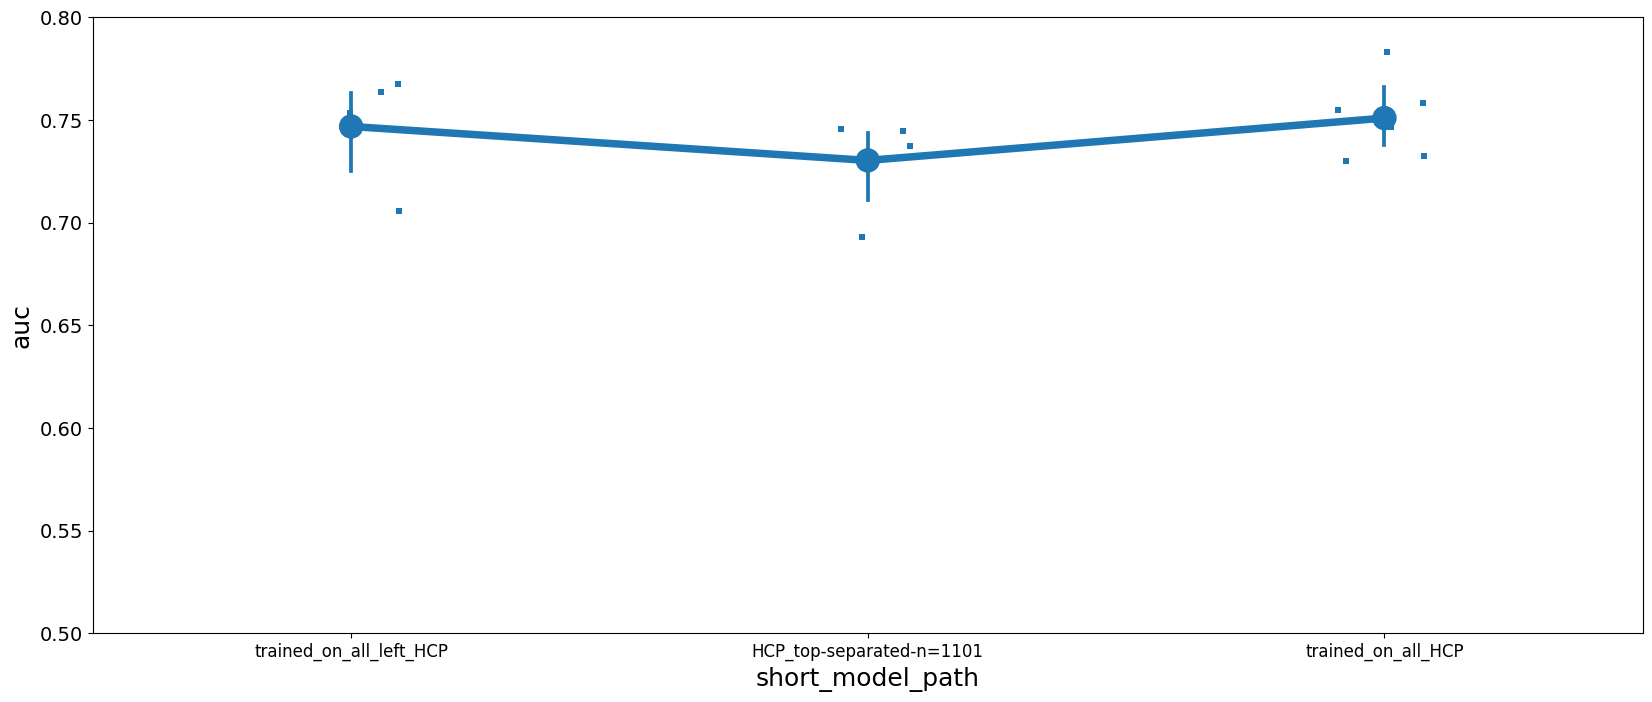

In [17]:
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', labelsize=18) 
f, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.pointplot(data=bdd, x=bdd.short_model_path, y="auc", scale=2,ax=ax)
sns.stripplot(data=bdd, x=bdd.short_model_path, y="auc", marker='s', jitter=0.1, ax=ax)
# ax.legend([],[], frameon=False)
ax.set_ylim([0.5,0.8])
# ax.set_xscale('log')